# Support Vector Machine Code Demo

- **Objective**: Develop an SVM classification model to determine if a mushroom is poisonous or edible.
- **Dataset**: Mushroom Classification Dataset
https://www.kaggle.com/uciml/mushroom-classification

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [58]:
df = pd.read_csv('Data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
#Have all categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
#Check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Preprocessing and EDA

Check if the **response variable** is properly **balanced**, should check this with all classification problems.

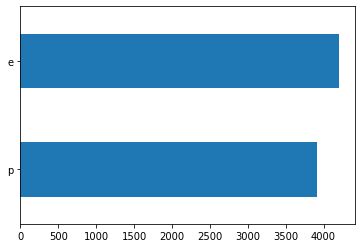

In [61]:
#Nearly equivalent amount of both classes
df['class'].value_counts().sort_values().plot(kind = 'barh')

All variables are **categorical** need to **encode** the data.

In [62]:
def encodeCategorical(data):
    labelencoder=LabelEncoder()
    for col in data.columns:
        data[col] = labelencoder.fit_transform(data[col])
    return data
df = encodeCategorical(df)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Scaling and Train-Test-Split

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def prepareData(df):
    X = df.iloc[:,1:23]
    y = df.iloc[:, 0]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepareData(df)

## Model 1: Linear SVM

First model is an SVM with a **linear kernel**. Linear SVM is the simplest of the kernels and each different kernel has its own use case depending on your dataset. For our instance we will try out all the different kernels to compare results, but when it comes to a real-time large dataset, factors such as number of dimensions and **computing power** all play a large role in the most optimal kernel. I've attached a link with further analysis of the different kernels (Read up on theory portion of notion page as well for more explanation).

https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html

In [68]:
#Created a function that takes in kernelType, our first model is taking a linear kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
def SVM(X_train, X_test, y_train, y_test, kernelType):
    svclassifier = SVC(kernel=kernelType)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    return confusionMatrix, classificationReport

## Evaluating Linear SVM

In [69]:
confusionMatrixSVM, classificationReportSVM = SVM(X_train, X_test, y_train, y_test, 'linear')
print(confusionMatrixSVM)
print(classificationReportSVM)

[[820  13]
 [  4 788]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       833
           1       0.98      0.99      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



## Polynomial SVM 

In [70]:
confusionMatrixSVM, classificationReportSVM = SVM(X_train, X_test, y_train, y_test, 'poly')
print(confusionMatrixSVM)
print(classificationReportSVM)

[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## RBF SVM

In [72]:
confusionMatrixSVM, classificationReportSVM = SVM(X_train, X_test, y_train, y_test, 'rbf')
print(confusionMatrixSVM)
print(classificationReportSVM)

[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Our **Polynomial** and **RBF** SVMs perform at a 100% accuracy, with the Linear SVM at 99%.